### Application of GPcounts on the single-cell RNA-seq data to identify gene-specific branching locations for individual genes. 

This notebook demonstrates how to build a GPcounts model and plot the posterior model fit and posterior branching times. We have used the single-cell RNA-seq of haematopoietic stem cells (HSCs) from mouse <a href="https://pubmed.ncbi.nlm.nih.gov/26627738/" target="_blank" text_decoration=none>(Paul et al., 2015)</a>. The data contain cells that are differentiated into myeloid and erythroid precursor cell types.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
# from IPython.display import display

### Data description

Slingshot algorithm <a href="https://pubmed.ncbi.nlm.nih.gov/29914354/" target="_blank">(Street et al., 2018)</a> has been used to get trajectory-specific pseudotimes as well as  assignment of cells to different branches. Slingshot infers two lineages for this dataset. The data were derived from the <a href="https://statomics.github.io/tradeSeq/articles/tradeSeq.html" target="_blank">tradeSeq vignette</a>.

The __geneExpression.csv__ file contains the expression profiles of HSCs from mouse.  

The __Slingshot.csv__ file contains lineage-specific cell assignments as well as pseudotimes.

In [2]:
data = pd.read_csv('../data/MouseHSC/geneExpression.csv', index_col=[0]).T
slingShot = pd.read_csv('../data/MouseHSC/Slingshot.csv', index_col=[0])

In [3]:
data.head()

,Mpo,Ly6e,Car1,Car2,Prtn3,Gstm1,Irf8,Erp29,Ctsg,Elane,Apoe,Calr,Klf1,Actb,Cfl1,Sod1,Ran,Vamp5,Alas1
W31105,0,1,1,1,1,2,0,0,0,0,1,1,0,2,1,0,0,0,0
W31106,95,19,2,0,60,7,3,8,9,56,2,30,2,27,15,5,3,1,9
W31107,8,9,51,46,3,1,0,2,0,2,1,9,10,52,10,11,5,1,0
W31108,124,15,4,4,95,11,0,3,54,73,0,75,1,50,10,2,6,3,18
W31109,12,10,41,54,1,0,0,4,4,1,0,11,5,55,9,15,8,3,0


In [4]:
slingShot.head()

,curve1,curve2,pseudotime
W31105,1.0,1.0,0.036348
W31106,1.0,0.0,0.840813
W31107,0.0,1.0,0.759424
W31108,1.0,0.0,0.997455
W31109,0.0,1.0,0.766015


Slingshot assigns a weight to each cell indicating the assignment of cells to different branches. We have used assignment probability 0.80 to determine the cells belong to a specific branch (1 or 2) .

In [5]:
cell_label = np.ones(slingShot.shape[0]) * 2
for i in range(0, slingShot.shape[0]):
    if slingShot.values[i, 0] > 0.8:
        cell_label[i] = 1

### Fit GPcounts model for branching

We have shown examples using both the Negative binomial and the Gaussian likelihood

### Negative bionomial likelihood

In [6]:
from GPcounts.GPcounts_Module import Fit_GPcounts
def Fit_GPcounts_for_branching(geneName, likelihood='Negative_binomial', bins_num=50, ns=5):
    X = slingShot[1::ns][['pseudotime']] 
    Y = data[1::ns][[geneName]].T
    gp_counts = Fit_GPcounts(X,Y)
    d = gp_counts.Infer_branching_location(cell_label[1::ns], bins_num=bins_num, lik_name=likelihood)
    del gp_counts
    return d
d = Fit_GPcounts_for_branching('Mpo', bins_num=25)

#### plot the posterior model fit and posterior branching times

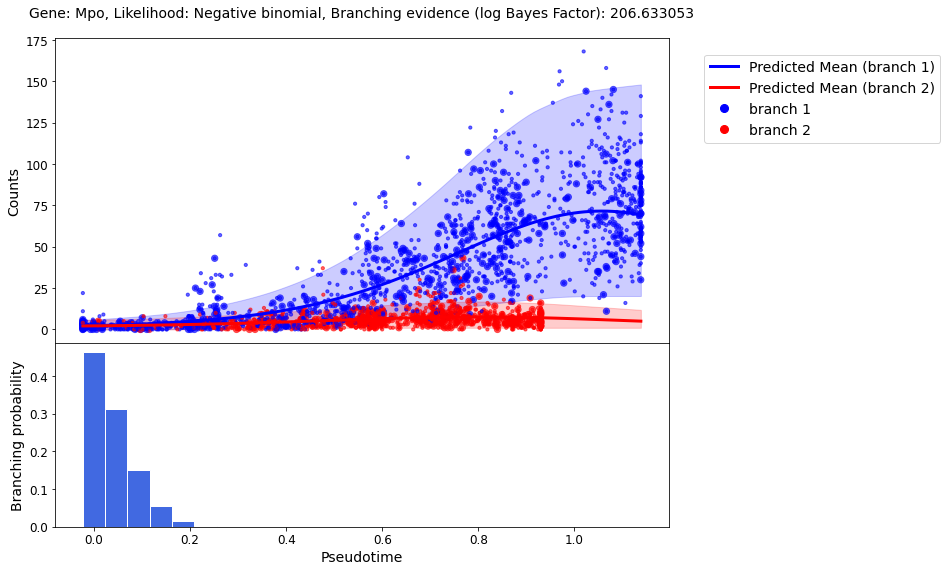

In [7]:
from helper import plotBranching, plotGene
fig, ax = plotBranching(d)
plotGene(ax[0], X=slingShot[['pseudotime']], Y=data[['Mpo']].T, label=cell_label, size=10, alpha=.6)

### Gaussian likelihood

In [8]:
geneName = 'Mpo'
d = Fit_GPcounts_for_branching(geneName, 'Gaussian', bins_num=25)

#### plot the posterior model fit and posterior branching times

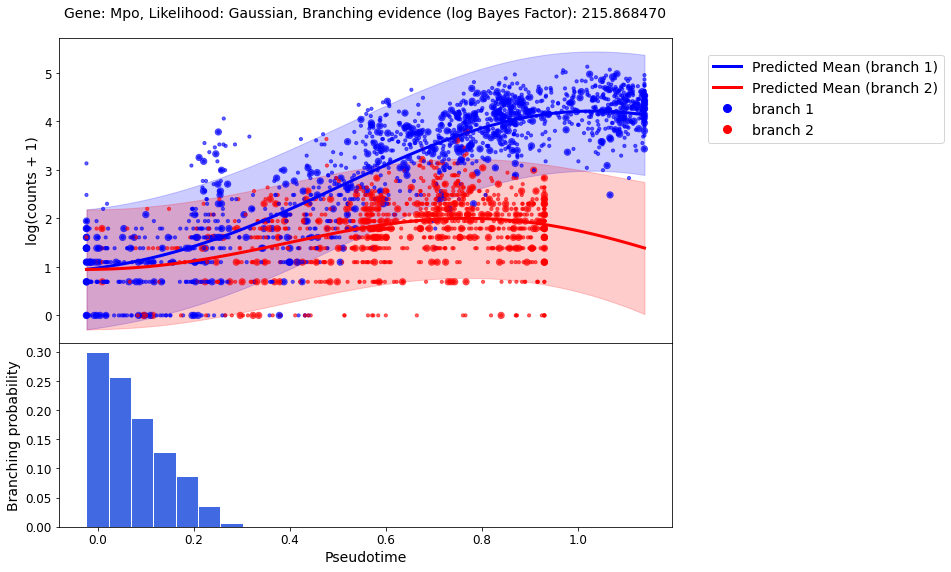

In [9]:
ig, ax = plotBranching(d)
plotGene(ax[0], X=slingShot[['pseudotime']], Y=np.log(data[[geneName]].T + 1), label=cell_label, size=10, alpha=.6)